In [178]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [179]:
jitz = pd.read_csv(r"C:\Users\tanne\Programming\DataSets\All Submission Only Data - Master Submission Only Data Adult.csv")

In [180]:
jitz.head()

,Hours,Minutes,Seconds,Total Seconds,Gi/No Gi,Belt/Skill,Division,submission,Unnamed: 8
0,NaN,NaN,5.0,5.0,Gi,Blue,Men,Straight ankle,Master Average: 506 seconds
1,NaN,NaN,7.0,7.0,No Gi,Advanced,Men,brabo,NaN
2,NaN,NaN,8.0,8.0,gi,white,30+ Men,Armbar,Data through Sub Only Richmond December 2018
3,NaN,NaN,9.0,9.0,Gi,Brown,Men,Darce,Missing Philly 2018 Sub Only
4,NaN,NaN,9.0,9.0,Gi,Blue,Men,Straight ankle,NaN


In [181]:
jitz.isnull().sum()

Hours            6118
Minutes           432
Seconds           209
Total Seconds       1
Gi/No Gi            9
Belt/Skill          0
Division            0
submission         41
Unnamed: 8       6156
dtype: int64

In [182]:
jitz.drop(['Hours','Minutes','Seconds','Unnamed: 8'], axis=1,inplace=True)

In [183]:
jitz.columns = ['time(seconds)','gi/no_gi','belt/skill','division','submission']

In [184]:
jitz.head()

,time(seconds),gi/no_gi,belt/skill,division,submission
0,5.0,Gi,Blue,Men,Straight ankle
1,7.0,No Gi,Advanced,Men,brabo
2,8.0,gi,white,30+ Men,Armbar
3,9.0,Gi,Brown,Men,Darce
4,9.0,Gi,Blue,Men,Straight ankle


In [185]:
jitz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time(seconds)  6158 non-null   float64
 1   gi/no_gi       6150 non-null   object 
 2   belt/skill     6159 non-null   object 
 3   division       6159 non-null   object 
 4   submission     6118 non-null   object 
dtypes: float64(1), object(4)
memory usage: 240.7+ KB


In [186]:
# As seen above, there are still a few rows with null values in the gi/no_gi column and also in the submission column
# These null values will be replaces with NA
jitz['gi/no_gi'].fillna('NA',inplace=True)
jitz['submission'].fillna('NA',inplace=True)

In [187]:
# Now we just have to deal with the one null value in the time column, since the division is 'men' I will
# replace the null value with the average time where division == 'men'
jitz[jitz.isna().any(axis=1)]

,time(seconds),gi/no_gi,belt/skill,division,submission
5562,NaN,No Gi,beginner,men,kneebar


In [188]:
men = jitz[jitz['division'] == 'men']
jitz['time(seconds)'].fillna(men['time(seconds)'].mean(),inplace=True)

In [189]:
jitz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time(seconds)  6159 non-null   float64
 1   gi/no_gi       6159 non-null   object 
 2   belt/skill     6159 non-null   object 
 3   division       6159 non-null   object 
 4   submission     6159 non-null   object 
dtypes: float64(1), object(4)
memory usage: 240.7+ KB


All the null values are gone, we will now move onto correcting the text in the other columns. Mainly the submission column which contains a varied names and other differences that will make it hard to analyze that column.

In [190]:
jitz['gi/no_gi'].unique()

array(['Gi', 'No Gi', 'gi', 'no gi', 'No GI ', 'Gi ', 'gi ', 'NA',
       'No Gi ', 'No GI', 'GI'], dtype=object)

In [191]:
jitz['gi/no_gi'] = jitz['gi/no_gi'].apply(lambda x: x.lower().strip())

In [192]:
jitz['gi/no_gi'].unique()
jitz['belt/skill'].unique()

array(['Blue', 'Advanced', 'white', 'Brown', 'Intermediate',
       'intermediate', 'White', 'Novice', 'beginner', 'Beginner', 'blue',
       'Purple', 'purple', 'novice', 'brown', 'advanced', 'Black',
       'black', 'jvadv', 'jvint', '30+ Men', 'Blue ', 'Novice '],
      dtype=object)

In [193]:
jitz['belt/skill'] = jitz['belt/skill'].apply(lambda x: x.lower().strip())
jitz['division'] = jitz['division'].apply(lambda x: x.lower().strip().replace("'s",''))
jitz['submission'] = jitz['submission'].apply(lambda x: x.lower().strip())

In [194]:
jitz['division'] = jitz['division'].apply(lambda x: 'masters' if '30' in x else x)
jitz['division'].unique()

array(['men', 'masters', 'women', 'juvenile'], dtype=object)

In [195]:
# cleaning up the sumbission column
jitz['submission'] = jitz['submission'].apply(lambda x: 'straight ankle' if 'ankle' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'bow & arrow' if 'bow' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'darce' if 'brabo' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'darce' if "'d'arce" in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'toe hold' if 'hold' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'arm triangle' if 'head and arm' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'arm triangle' if 'head & arm' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'paper cutter' if 'paper' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'north south choke' if 'ns choke' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'na' if '?' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'paper cutter' if 'bread' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'paper cutter' if 'cutter' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'baseball bat choke' if 'baseball' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'knee bar' if 'knee' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'armbar' if 'arm' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'heel hook' if 'heel' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'collar choke' if 'cross choke' in x else x)
jitz['submission'] = jitz['submission'].apply(lambda x: 'collar choke' if 'cross' in x else x)

In [212]:
# creating frequency chart for submissions
submission_frequency = {}
for submission in jitz['submission']:
    if submission not in submission_frequency:
        submission_frequency[submission] = 1
    else:
        submission_frequency[submission] += 1
sorted_submissions = []
for sub in submission_frequency:
    sorted_submissions.append([submission_frequency[sub], sub])
sorted_submissions = sorted(sorted_submissions,reverse=True)
sorted_submissions = [x for x in sorted_submissions if x[1] != 'na']
for sub in sorted_submissions:
    print(sub[1], ':', sub[0])

armbar : 1607
triangle : 667
rnc : 511
kimura : 497
americana : 418
straight ankle : 314
guillotine : 248
collar choke : 238
ezekiel : 205
bow & arrow : 199
heel hook : 112
knee bar : 109
darce : 102
choke : 78
paper cutter : 75
baseball bat choke : 54
wristlock : 53
lapel choke : 51
shoulder lock : 48
toe hold : 40
omoplata : 36
injury : 36
north south choke : 29
loop choke : 27
dq : 26
keylock : 25
clock choke : 15
pressure : 14
verbal submission : 12
d'arce : 12
wrist lock : 11
not written down : 10
footlock : 9
verbal tap : 8
punch choke : 8
north/south choke : 8
forfeit : 7
verbal sub : 6
gi choke : 6
calf slicer : 6
single wing choke : 5
anaconda : 5
texas cloverleaf : 4
side choke : 4
gogoplata : 4
exhaustion : 4
smother : 3
reverse triangle : 3
peruvian necktie : 3
not listed : 3
neck crank : 3
n/s choke : 3
mounted triangle : 3
leg scissor : 3
giullotine : 3
dq slam : 3
unknown : 2
twister : 2
smothering : 2
side control : 2
scissor choke : 2
ninja choke : 2
neck tie : 2
heek 

In [197]:
jitz

,time(seconds),gi/no_gi,belt/skill,division,submission
0,5.0,gi,blue,men,straight ankle
1,7.0,no gi,advanced,men,darce
2,8.0,gi,white,masters,armbar
3,9.0,gi,brown,men,darce
4,9.0,gi,blue,men,straight ankle
...,...,...,...,...,...
6154,612.0,gi,white,men,armbar
6155,113.0,gi,white,men,kimura
6156,90.0,gi,white,men,collar choke
6157,165.0,gi,white,men,collar choke


The data is now cleaned, time to analyze.

In [198]:
jitz_men = jitz[jitz['division'] == 'men']
jitz_women = jitz[jitz['division'] == 'women']

In [199]:
# average match times
average_time = jitz['time(seconds)'].mean()
average_time_men = jitz_men['time(seconds)'].mean()
average_time_women = jitz_women['time(seconds)'].mean()
print('Average match time: ', round(average_time/60, 2), ' minutes.')
print('Average match time for men: ',round(average_time_men/60,2), ' minutes.')
print('Average match time for women: ',round(average_time_women/60,2), ' minutes.')

Average match time:  8.44  minutes.
Average match time for men:  8.27  minutes.
Average match time for women:  8.61  minutes.


In [200]:
# Number of people in each belt/skill level
no_gi = jitz[jitz['gi/no_gi'] == 'no gi']
gi = jitz[jitz['gi/no_gi'] == 'gi']
#belts
white = jitz[jitz['belt/skill'] == 'white']
blue = jitz[jitz['belt/skill'] == 'blue']
purple = jitz[jitz['belt/skill'] == 'purple']
brown = jitz[jitz['belt/skill'] == 'brown']
black = jitz[jitz['belt/skill'] == 'black']
#no_gi
novice = jitz[jitz['belt/skill'] == 'novice']
beginner = jitz[jitz['belt/skill'] == 'beginner']
intermediate = jitz[jitz['belt/skill'] == 'intermediate']
advanced = jitz[jitz['belt/skill'] == 'advanced']
print('GI MATCHES')
print('Number of white belts: ', len(white), ' Percentage: ', round(((len(white)/len(gi))*100), 2), '%')
print('Number of blue belts: ', len(blue), ' Percentage: ', round(((len(blue)/len(gi))*100), 2), '%')
print('Number of purple belts: ', len(purple), ' Percentage: ', round(((len(purple)/len(gi))*100), 2), '%')
print('Number of brown belts: ', len(brown), ' Percentage: ', round(((len(brown)/len(gi))*100), 2), '%')
print('Number of black belts: ', len(black), ' Percentage: ', round(((len(black)/len(gi))*100), 2), '%')
print('NO GI MATCHES')
print('Number of beginners: ', len(beginner), ' Percentage: ', round(((len(beginner)/len(no_gi))*100), 2), '%')
print('Number of novices: ', len(novice), ' Percentage: ', round(((len(novice)/len(no_gi))*100), 2), '%')
print('Number of intermediate: ', len(intermediate), ' Percentage: ', round(((len(intermediate)/len(no_gi))*100), 2), '%')
print('Number of advanced: ', len(advanced), ' Percentage: ', round(((len(advanced)/len(no_gi))*100), 2), '%')

GI MATCHES
Number of white belts:  1370  Percentage:  45.14 %
Number of blue belts:  955  Percentage:  31.47 %
Number of purple belts:  455  Percentage:  14.99 %
Number of brown belts:  142  Percentage:  4.68 %
Number of black belts:  104  Percentage:  3.43 %
NO GI MATCHES
Number of beginners:  934  Percentage:  29.98 %
Number of novices:  383  Percentage:  12.3 %
Number of intermediate:  1080  Percentage:  34.67 %
Number of advanced:  718  Percentage:  23.05 %


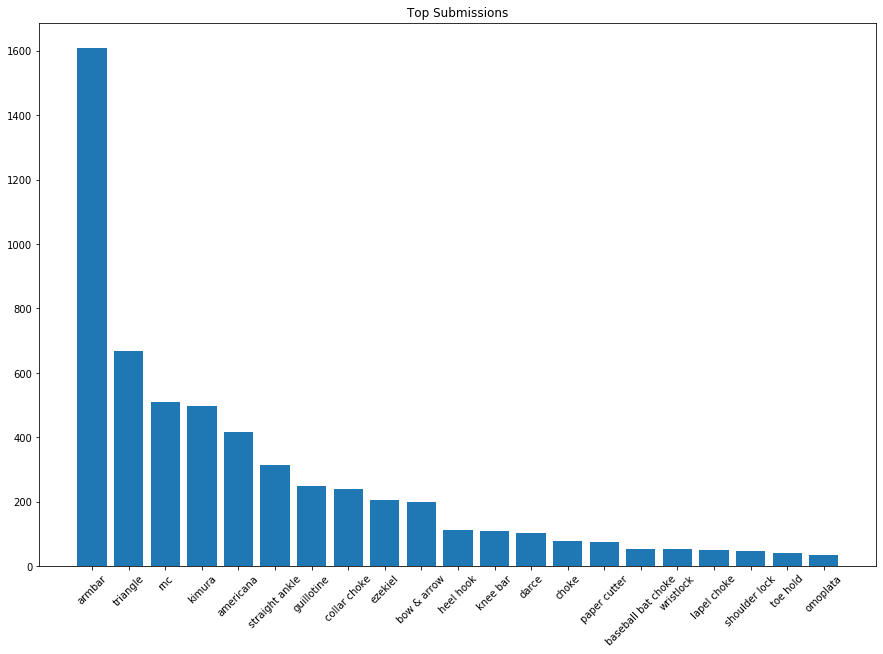

In [213]:
submissions = [x[1] for x in sorted_submissions]
submission_amounts = [x[0] for x in sorted_submissions]
plt.figure(figsize=(15,10))
plt.bar(submissions[:21], submission_amounts[:21])
plt.xticks(rotation=45)
plt.title('Top Submissions')
plt.show()

In [216]:
# Seperating submissions between gi and no gi
no_gi_submission = {}
for submission in no_gi['submission']:
    if submission not in no_gi_submission:
        no_gi_submission[submission] = 1
    else:
        no_gi_submission[submission] += 1
sorted_no_gi_submissions = []
for sub in no_gi_submission:
    sorted_no_gi_submissions.append([no_gi_submission[sub], sub])
sorted_no_gi_submissions = sorted(sorted_no_gi_submissions,reverse=True)

gi_submission = {}
for submission in gi['submission']:
    if submission not in gi_submission:
        gi_submission[submission] = 1
    else:
        gi_submission[submission] += 1
sorted_gi_submissions = []
for sub in gi_submission:
    sorted_gi_submissions.append([gi_submission[sub], sub])
sorted_gi_submissions = sorted(sorted_gi_submissions,reverse=True)

sorted_no_gi_submissions = [x for x in sorted_no_gi_submissions if x[1] != 'na']


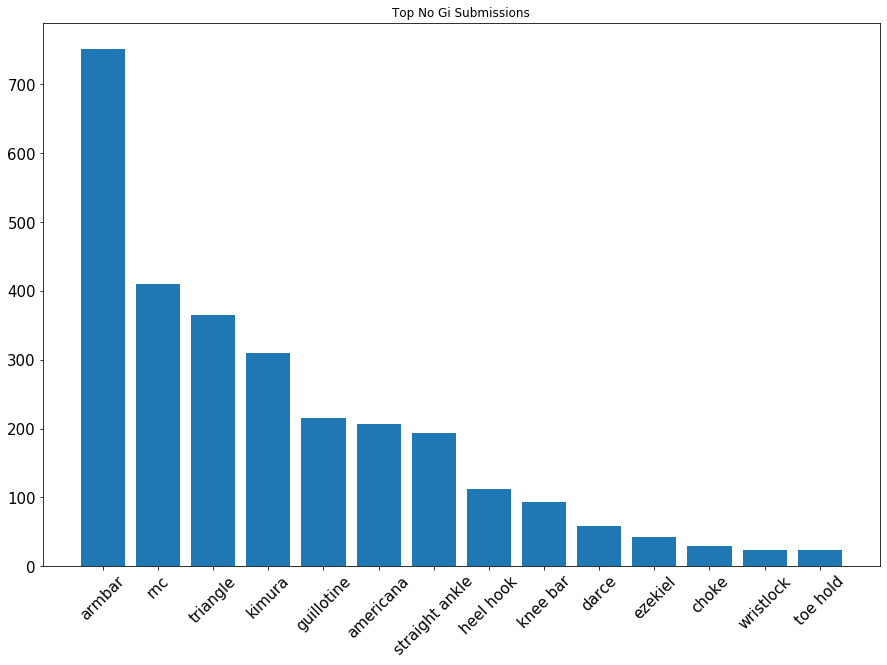

In [233]:
submissions = [x[1] for x in sorted_no_gi_submissions]
submission_amounts = [x[0] for x in sorted_no_gi_submissions]
plt.figure(figsize=(15,10))
plt.bar(submissions[:14], submission_amounts[:14])
plt.xticks(rotation=45)
plt.title('Top No Gi Submissions')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()

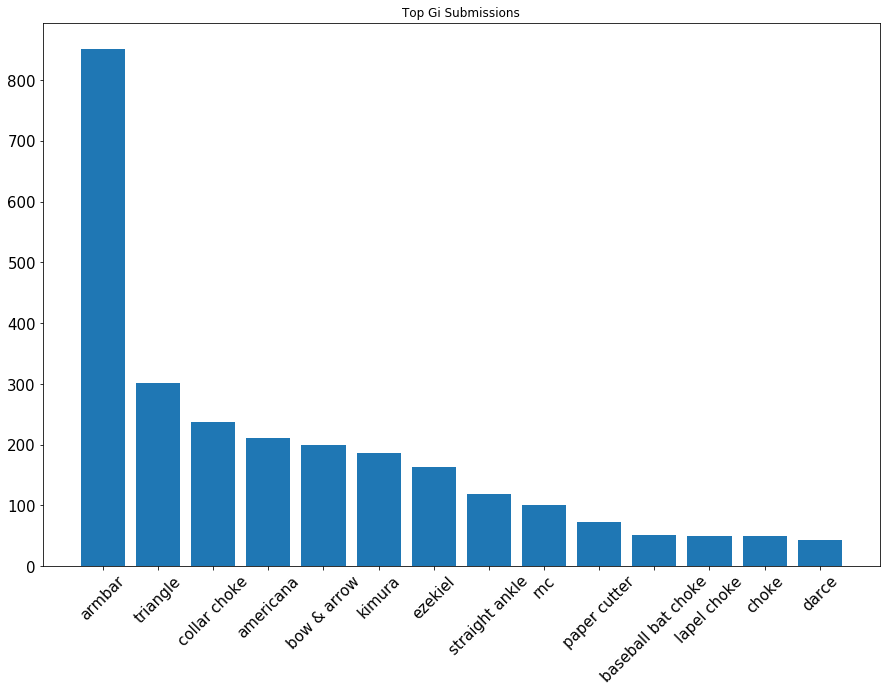

In [234]:
submissions = [x[1] for x in sorted_gi_submissions]
submission_amounts = [x[0] for x in sorted_gi_submissions]
plt.figure(figsize=(15,10))
plt.bar(submissions[:14], submission_amounts[:14])
plt.xticks(rotation=45)
plt.title('Top Gi Submissions')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.show()

In [235]:
len(jitz)

6159